In [1]:
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Deep Learning
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

Using TensorFlow backend.


# Building a Convolutional Network with Keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

img_y, img_x=[28,28]
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, 10)
#y_test = keras.utils.to_categorical(y_test, 10)
y_valid=keras.utils.to_categorical(y_valid,10)

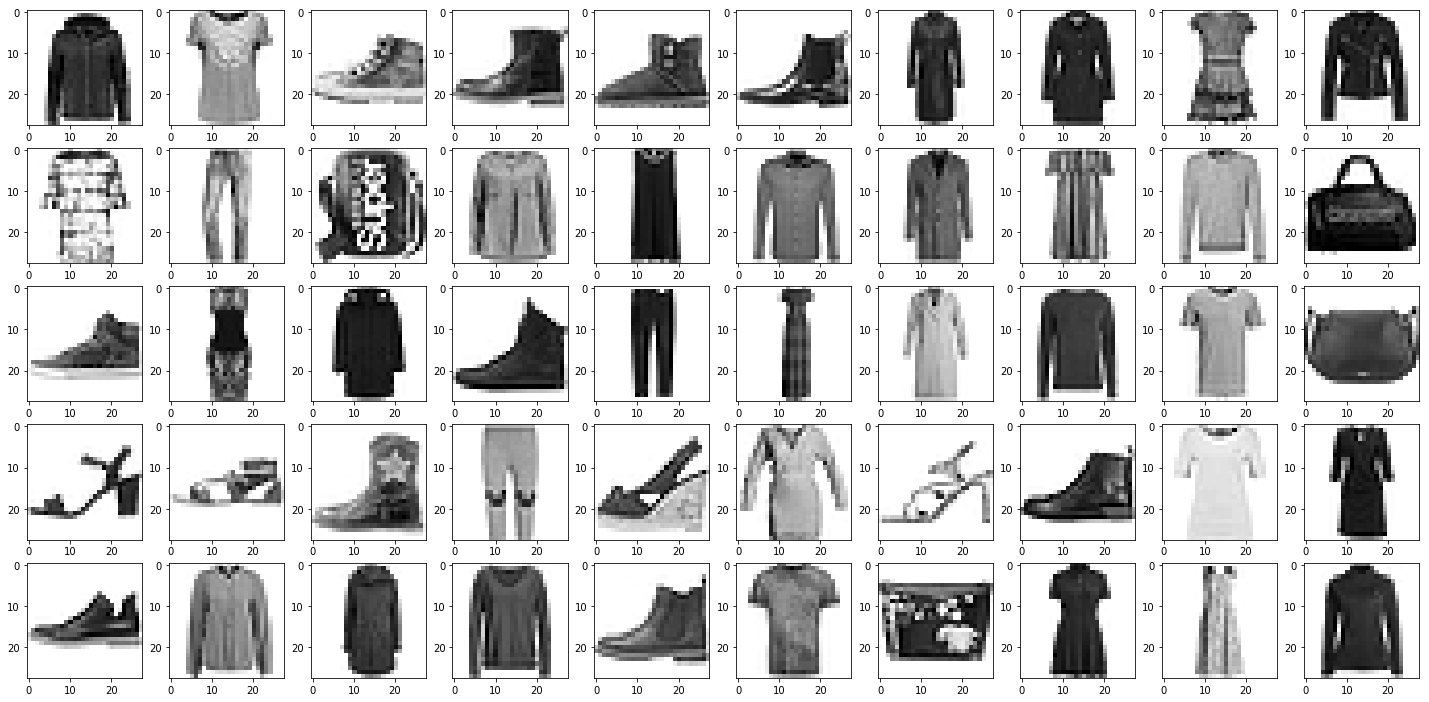

In [4]:
N = 50
plt.figure(figsize=(25,25))
for i in range(0,N):
    plt.subplot(10,N/5,i+1)
    plt.imshow(X_train[i], cmap='binary')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
#Xs_train = scaler.fit_transform(X_train)
s=X_train.shape
d=scaler.fit_transform(X_train.reshape(s[0],-1))
Xs_train=np.reshape(d,(s[0],s[1],s[2],1))

def img_scale(datas):
    s=datas.shape
    d=scaler.transform(datas.reshape(s[0],-1))
    return(np.reshape(d,(s[0],s[1],s[2],1)))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
Xs_test=img_scale(X_test)
Xs_valid=img_scale(X_valid)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
build_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total para

In [10]:
from keras.wrappers.scikit_learn import KerasClassifier
model=KerasClassifier(build_model,epochs=5,batch_size=32,verbose=1)

In [11]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

callbacks=[EarlyStopping(
                    monitor='val_acc',
                    patience=5,
                    verbose=1,
                    mode='auto'),
                ModelCheckpoint('weights.{epoch:02d}-{acc:.2f}.hdf5',
                    monitor='val_acc',
                    verbose=1,
                    save_best_only=True,
                    save_weights_only=False,
                    mode='auto')]

history=model.fit(Xs_train, y_train, epochs=5,validation_data=(Xs_valid,y_valid),shuffle=True )

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 54s 986us/step - loss: 0.4150 - acc: 0.8496 - val_loss: 0.3179 - val_acc: 0.8850
Epoch 2/5
55000/55000 [==============================] - 53s 957us/step - loss: 0.2831 - acc: 0.8953 - val_loss: 0.2748 - val_acc: 0.9002
Epoch 3/5
55000/55000 [==============================] - 62s 1ms/step - loss: 0.2363 - acc: 0.9121 - val_loss: 0.2850 - val_acc: 0.8936
Epoch 4/5
55000/55000 [==============================] - 54s 984us/step - loss: 0.2005 - acc: 0.9253 - val_loss: 0.2380 - val_acc: 0.9094
Epoch 5/5
55000/55000 [==============================] - 52s 944us/step - loss: 0.1677 - acc: 0.9358 - val_loss: 0.2697 - val_acc: 0.9132


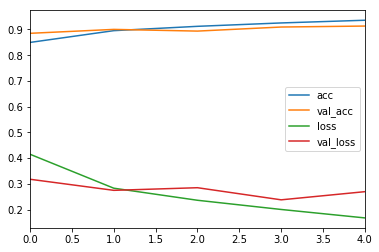

In [12]:
df_hist=pd.DataFrame(history.history)
df_hist.acc.plot()
df_hist.val_acc.plot()
df_hist.loss.plot()
df_hist.val_loss.plot()
plt.legend()
plt.show()

In [13]:
score = model.predict(Xs_test)

10000/10000 [==============================] - 2s 155us/step


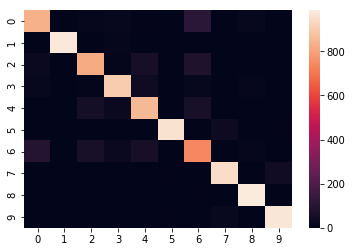

In [16]:
#Comparer les scores
from sklearn.metrics import confusion_matrix

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

sns.heatmap(confusion_matrix(y_test,score))
plt.show()